<a href="https://colab.research.google.com/github/juanalverto/Breast_Cancer_Wisconsin_Test/blob/main/Breast_Cancer_Wisconsin_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer Wisconsin Dataset**

En este ejemplo, trabajaremos con la base de datos Breast Cancer Wisconsin Dataset, la cual contiene 569 instancias que representan tumores benignos y malignos. La primera columa de la base de datos, almacena el ID de cada instancia, mientras que la segunda columna almacena la etiqueta de dicha instancia, donde esta etiqueta corresponde al diagnóstico (M=Maligno, B=Beningno). Las columnas 3-32 registran los valores númericos que se relacionan con las características del núcleo celular, tales como el radio, perímetro, concavidad, entre otros.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

In [ ]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.shape

(569, 32)

Procedemos a extraer los atributos de cada instancia y sus etiquetas correspondientes. Así mismo, hacemos que las etiquetas, originalmente codificadas con caracteres, se conviertan en enteros.

In [ ]:
dataset = data.loc[:, 2:].values
labels = data.loc[:, 1].values
print(labels)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [ ]:
dataset.shape

(569, 30)

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Transformamos las etiquetas de caracter a entero
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

In [ ]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

Podemos ver como las etiquetas que originalmente estaban codificadas a partir de los caracteres "B" y "M", ahora se representan mediante valores enteros "1" y "0", respectivamente. 

In [ ]:
encoder.classes_

array(['B', 'M'], dtype=object)

In [ ]:
encoder.transform(['M', 'B'])

array([1, 0])

# **Partición de la base de datos**

In [ ]:
#La clase train_test_split permite realizar la partición de la base de datos en los conjuntos de entrenamiento y de prueba.
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(dataset, labels, test_size=0.10, stratify=labels, random_state=1)
#test_size es un argumento que nos permitirá especificar la proporción de instancias que serán asignadas al conjunto de prueba
#stratify indica que los conjuntos de entrenamiento y de prueba, tienen la misma proporción de etiquetas de clase presente en la base de datos original
#random_state hace posible que las instancias de los conjuntos sean inicializadas aleatoriamente, y al asignarle un valor fijo, nos aseguramos de poder
#general resultados reproducibles.

# **Preprocesamiento de los datos**

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data_std = sc.fit_transform(train_data)
test_data_std = sc.transform(test_data)

In [ ]:
train_data_std.shape

(512, 30)

In [ ]:
test_data_std.shape

(57, 30)

# **Construcción de la red neuronal**

In [ ]:
from keras import models
from keras import layers
#Dropout permite regularizar a la red neuronal durante la etapa de entrenamiento
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(30,))) #Primera capa oculta
model.add(layers.Dropout(0.1))
model.add(layers.Dense(16, activation='relu')) #Segunda capa oculta
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))#Capa de salida

# **Compilación**

In [ ]:
from keras import optimizers
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# **Entrenamiento**

In [ ]:
history = model.fit(train_data,
                    train_labels,
                    epochs=150,
                    batch_size=100)

Epoch 1/150
6/6 [==============================] - 0s 2ms/step - loss: 29.0530 - accuracy: 0.5664
Epoch 2/150
6/6 [==============================] - 0s 2ms/step - loss: 24.8688 - accuracy: 0.5332
Epoch 3/150
6/6 [==============================] - 0s 2ms/step - loss: 17.0905 - accuracy: 0.5293
Epoch 4/150
6/6 [==============================] - 0s 2ms/step - loss: 19.6541 - accuracy: 0.4590
Epoch 5/150
6/6 [==============================] - 0s 2ms/step - loss: 15.4631 - accuracy: 0.5332
Epoch 6/150
6/6 [==============================] - 0s 4ms/step - loss: 13.6565 - accuracy: 0.5918
Epoch 7/150
6/6 [==============================] - 0s 2ms/step - loss: 14.7332 - accuracy: 0.6016
Epoch 8/150
6/6 [==============================] - 0s 2ms/step - loss: 12.2851 - accuracy: 0.6191
Epoch 9/150
6/6 [==============================] - 0s 2ms/step - loss: 12.9232 - accuracy: 0.5664
Epoch 10/150
6/6 [==============================] - 0s 2ms/step - loss: 12.3054 - accuracy: 0.6035
Epoch 11/150
6/6 [=

# **Curva de pérdida**

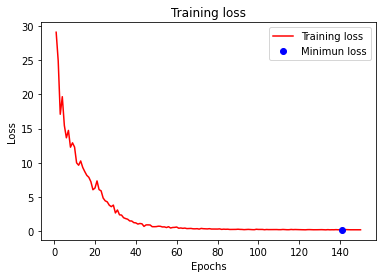

Best epoch:  141


In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
min_loss = min(loss)
min_loss_epoch= loss.index(min(loss)) + 1

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(min_loss_epoch, min_loss, 'bo', label='Minimun loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
print('Best epoch: ', min_loss_epoch)

In [ ]:
min_index = loss.index(min(loss)) + 1
print(min_index)

141


# **Curva de precisión**

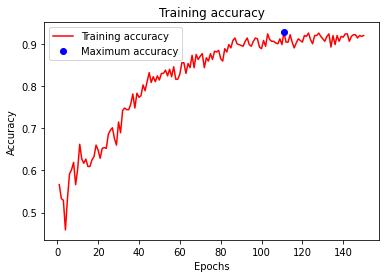

Best epoch:  111


In [ ]:
plt.clf()   # clear figure

acc = history.history['accuracy']
max_acc = max(acc)
max_acc_epoch= acc.index(max(acc)) + 1

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(max_acc_epoch, max_acc, 'bo', label='Maximum accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
print('Best epoch: ', max_acc_epoch)

# **Predicción**

Para esta etapa, mediante la expresión y_pred = (y_pred > 0.5), hacemos que aquellas instancias de entrada que tengan como resultado de salida un valor mayor a 0.5, sean representadas como "True" o 1, mientras que aquellas que tenga un valor menor a 0.5, sean representadas como "False" o 0.

In [ ]:
test_predictions = model.predict(test_data)
test_predictions

array([[0.04737276],
       [0.05645725],
       [0.629528  ],
       [1.        ],
       [0.03028497],
       [1.        ],
       [0.11061588],
       [0.11887798],
       [0.05606395],
       [0.7323096 ],
       [0.03681812],
       [0.9979167 ],
       [0.04288024],
       [0.05861863],
       [0.04765552],
       [0.02128586],
       [0.9938399 ],
       [0.07386333],
       [0.18675897],
       [0.08802196],
       [1.        ],
       [0.14566404],
       [0.755157  ],
       [0.15739569],
       [0.05340937],
       [0.9373388 ],
       [0.07778943],
       [0.08940414],
       [0.06752905],
       [0.06035942],
       [0.07018414],
       [0.0484556 ],
       [0.19308284],
       [0.04789308],
       [0.99999934],
       [0.6409591 ],
       [0.05425724],
       [0.1018239 ],
       [0.999928  ],
       [0.07733896],
       [0.12959969],
       [0.99980915],
       [0.05806476],
       [0.10359651],
       [0.20322987],
       [0.9977329 ],
       [0.12212896],
       [0.180

In [ ]:
test_predictions = (test_predictions > 0.5)
print(test_predictions)

[[False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]]


# **Matriz de confusión**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_predictions)

In [ ]:
cm

array([[36,  0],
       [ 3, 18]])

In [ ]:
print("La precisión es de {}%".format(((cm[0][0] + cm[1][1])/57)*100))

La precisión es de 94.73684210526315%


0
1
0
1


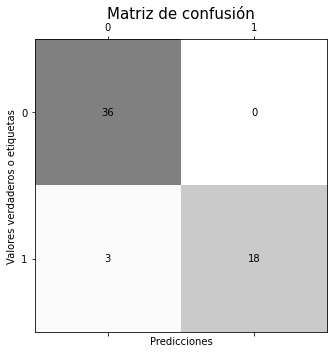

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Greys, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        print(j)
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

plt.title("Matriz de confusión", fontsize=15)
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos o etiquetas')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

NOTA: La arquitectura presentada en este notebook, los parámetros usados para entrenar dicha arquitectura y el código referente a la matriz de confusión, incluyendo el mapa de calor, se tomaron de: https://www.kaggle.com/thebrownviking20/intro-to-keras-with-breast-cancer-data-ann. Se recomienda leer dicha referencia, pues es un artículo introductorio sumamente accesible y didáctico.

# **Evaluación del desempeño con base a las métricas de precisión, recall y F1.**

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=test_labels, y_pred=test_predictions, average = 'binary'))
print('Recall: %.3f' % recall_score(y_true=test_labels, y_pred=test_predictions, average = 'binary'))
print('F1: %.3f' % f1_score(y_true=test_labels, y_pred=test_predictions, average = 'binary'))

Precision: 1.000
Recall: 0.857
F1: 0.923
